# Phase-1 Golden Task(Breast Cancer Prediction)



In [4]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
db=pd.read_csv("breast-cancer.csv")

In [7]:
db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
db.shape

(569, 32)

In [10]:
#Checking for missing values
db.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**no null values are present**

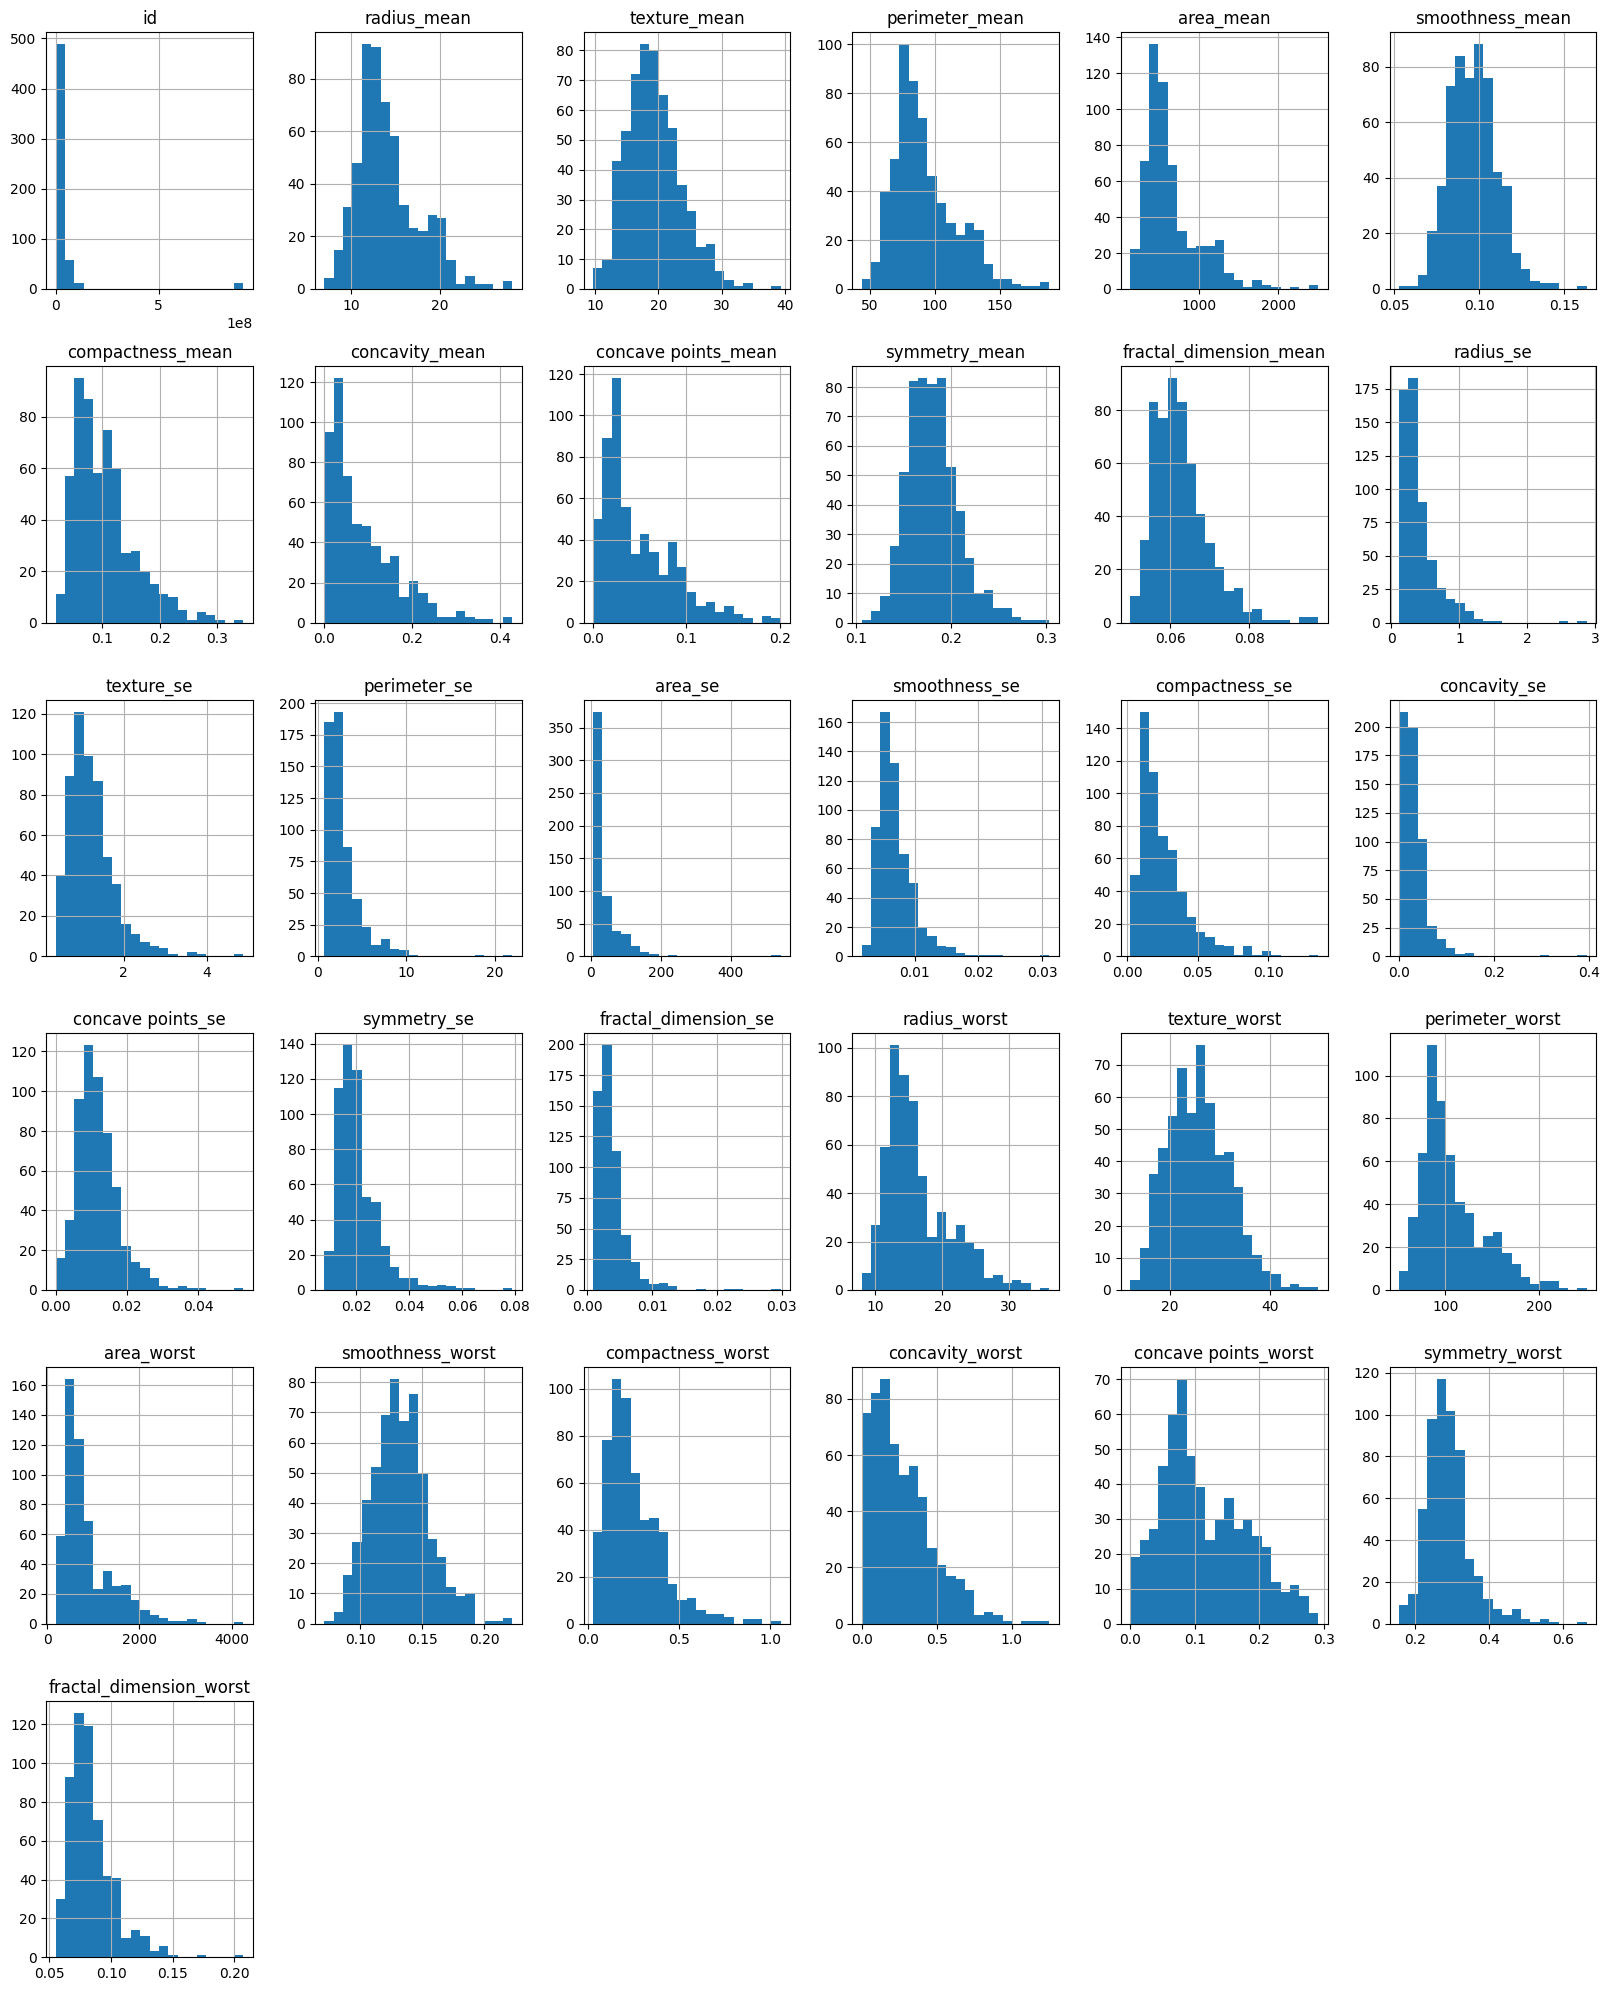

In [11]:
db.hist(bins=20, figsize=(20,25))
plt.show()

In [12]:
db['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Approximately data is balanced**

In [13]:
label_encoder = LabelEncoder()
label1 = label_encoder.fit_transform(db.diagnosis)
db['diagnosis'] = label1

In [14]:
db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1 -> M,
0 -> B

In [15]:
#seperating features and target
X = db.drop(columns='diagnosis',axis=1)
y= db['diagnosis']

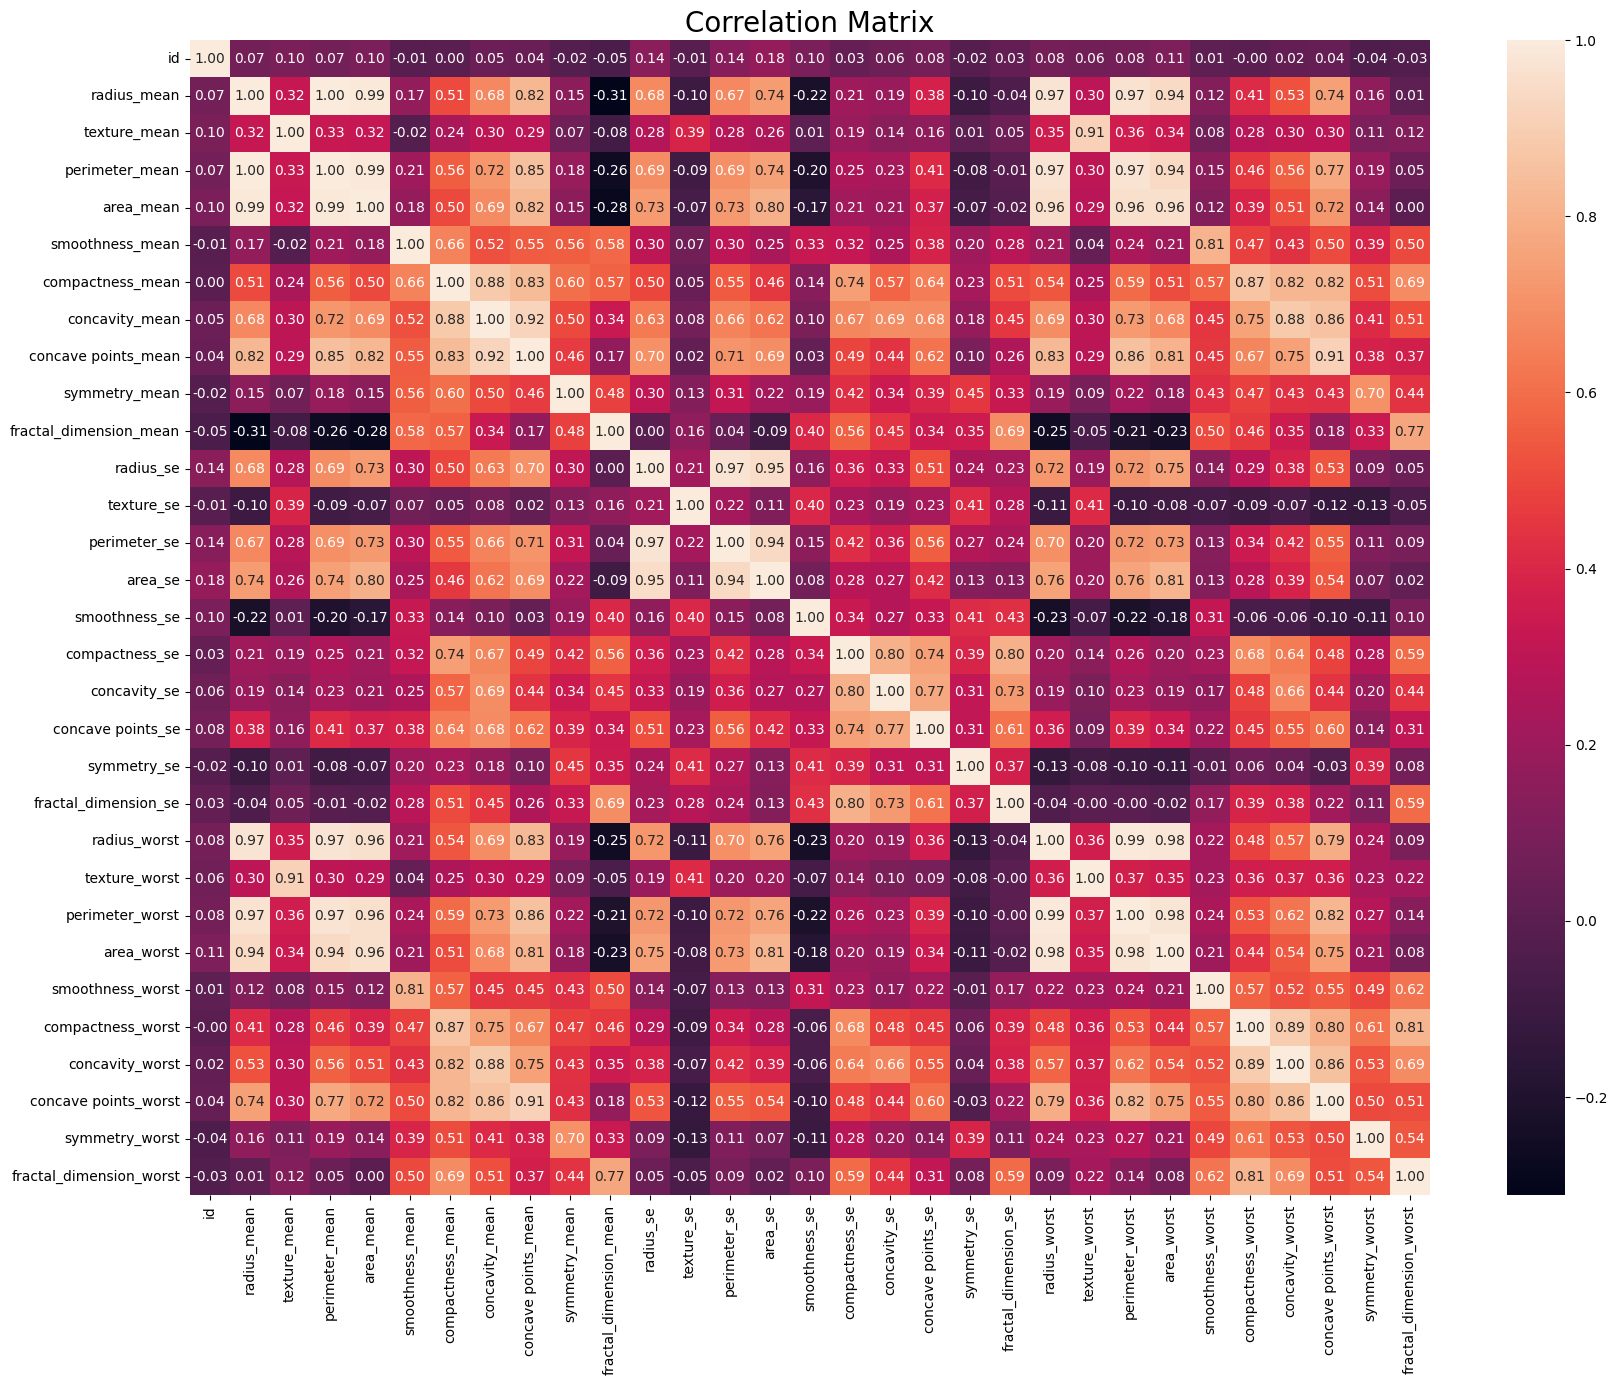

In [16]:
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, fmt=".2f", ax=ax )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
print(X.std())

id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


Standardizing data

In [18]:
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

print(X)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [19]:
X = np.asarray(X)
y = np.asarray(y)

**Hyperparameter Tuning**

In [20]:
models = [LogisticRegression(max_iter=1000,random_state=12),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=12)]

In [21]:
#creating a dictionary of hyperparameters

model_hyperparameters = {
     'log_reg_hyperparameters': {
        'C': [1,5,10,20]
    },

    'svc_hyperparameters': {
        'kernel': ['linear','poly','rbf','sigmoid'],
        'C': [1,5,10,20]
    },
    'KNN_hyperparameters':{
        'n_neighbors': [3,5,10],
        'leaf_size': [25,35,40]
    },

    'random_forest_hyperparameters': {
        'n_estimators': [10,20,50,100],
        "max_features": [3,5,7],
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]
    }
}

In [22]:
model_keys=list(model_hyperparameters.keys())

In [23]:
def ModelSelection(list_of_models, hyperparametrs_dictionary):

    result=[]
    i=0

    for model in list_of_models:
        key=model_keys[i]
        params=hyperparametrs_dictionary[key]
        i+=1

        print(model)
        print(params)

        classifier = GridSearchCV(model,params,cv=5)

        classifier.fit(X,y)

        result.append({
            'model used':model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns=['model used','highest score','best hyperparameters'])

    return result_dataframe

In [24]:
ModelSelection(models, model_hyperparameters)

LogisticRegression(max_iter=1000, random_state=12)
{'C': [1, 5, 10, 20]}
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10], 'leaf_size': [25, 35, 40]}
RandomForestClassifier(random_state=12)
{'n_estimators': [10, 20, 50, 100], 'max_features': [3, 5, 7], 'min_samples_split': [2, 5, 10, 30], 'max_depth': [3, 5, 8, None]}


,model used,highest score,best hyperparameters
0,"LogisticRegression(max_iter=1000, random_state...",0.978932,{'C': 1}
1,SVC(kernel='linear'),0.978932,"{'C': 5, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.966636,"{'leaf_size': 25, 'n_neighbors': 10}"
3,RandomForestClassifier(random_state=12),0.968390,"{'max_depth': None, 'max_features': 7, 'min_sa..."


**Training Model using SVC**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=12)

X_train.shape, X_test.shape

((455, 31), (114, 31))

In [26]:
classifier = SVC(kernel='rbf',C=5)
classifier.fit(X_train,y_train)

SVC(C=5)

In [27]:
X_train_pre = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_pre,y_train)

In [28]:
print(train_data_acc)

0.9912087912087912


In [29]:
X_test_pre = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_pre,y_test)

In [30]:
print(test_data_acc)

0.9736842105263158


<Axes: >

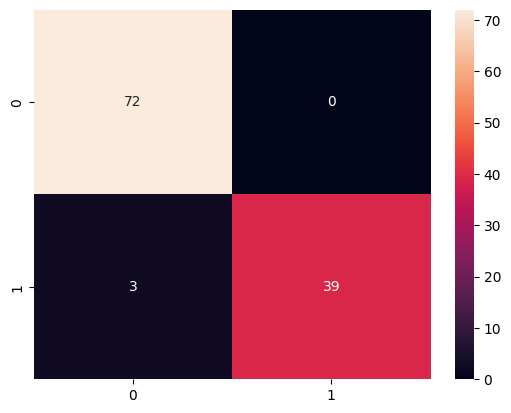

In [31]:
cf_matrix = confusion_matrix(y_test, X_test_pre)
sns.heatmap(cf_matrix,annot=True)

In [32]:
input_data = (84300903,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

input_asnumpy_array = np.asarray(input_data)
reshaped_input = input_asnumpy_array.reshape(1,-1)

std_input = scaler.transform(reshaped_input)
print(std_input)

prediction = classifier.predict(std_input)
print(prediction)

[[ 0.43174109  1.57988811  0.45618695  1.56650313  1.55888363  0.94221044
   1.05292554  1.36347845  2.03723076  0.93968482 -0.39800791  1.22867595
  -0.78008338  0.8509283   1.18133606 -0.29700501  0.8149735   0.21307643
   1.42482747  0.23703554  0.2935594   1.51187025 -0.02397438  1.34747521
   1.45628455  0.52740741  1.08293217  0.85497394  1.95500035  1.152255
   0.20139121]]
[1]


**The Patient is Malignant**